# 1. 문제정의

## 1.1 경진대회 소개

기업에서 실제 보유하고 있는 데이터를 자유롭게 활용하여 새로운 비즈니스 모델 및 **참신한 아이디어**를 제시하고, 빅데이터 인재발굴을 통한 청년 취업 기회를 제공하고자 합니다.

주요사항 -> 문제 유형 **예측**


### 평가
- 1차 심사(서류) : 평가 데이터 기반의 **음식물쓰레기 배출량의 예측 정확도 및 배출량 감소방안** (※ 최종점수는 예측 정확도와 배출량 감소 방안을 통합하여 산정)
- 2차 심사(PT발표) : 제출한 **예측모델 및 분석방법**에 대한 발표

### 배경
#### 제주도 음식물 쓰레기양 예측을 통한 배출량 감소 방안 도출
- 제주지역 음식물 쓰레기 데이터(제주테크노파크)를 활용한 **배출량 예측 모델 개발을 통하여 제주 읍면동별 배출량을 예측**하고, **음식물 쓰레기 배출 요인에 따른 배출량 감소 방안 도출**

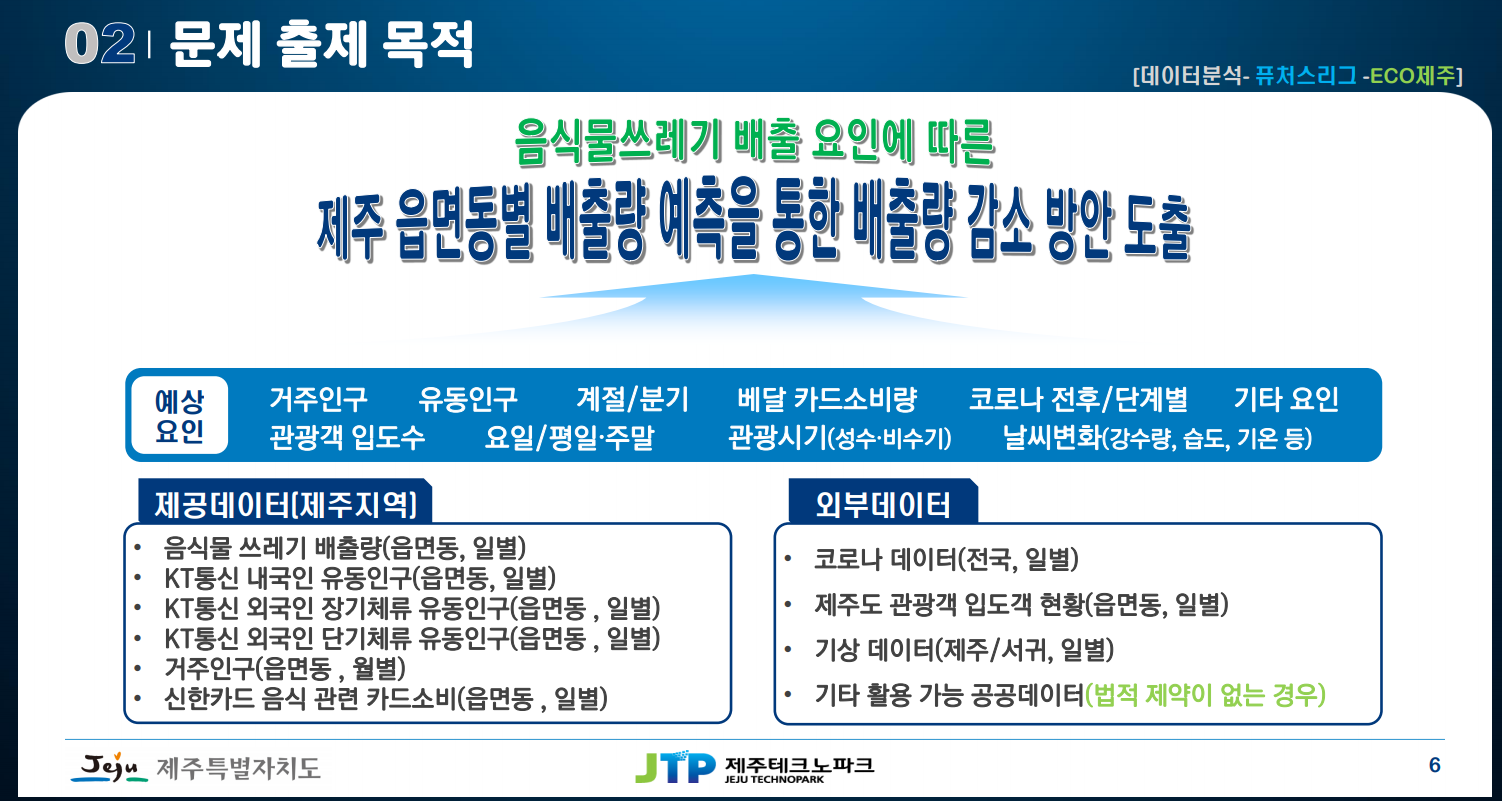

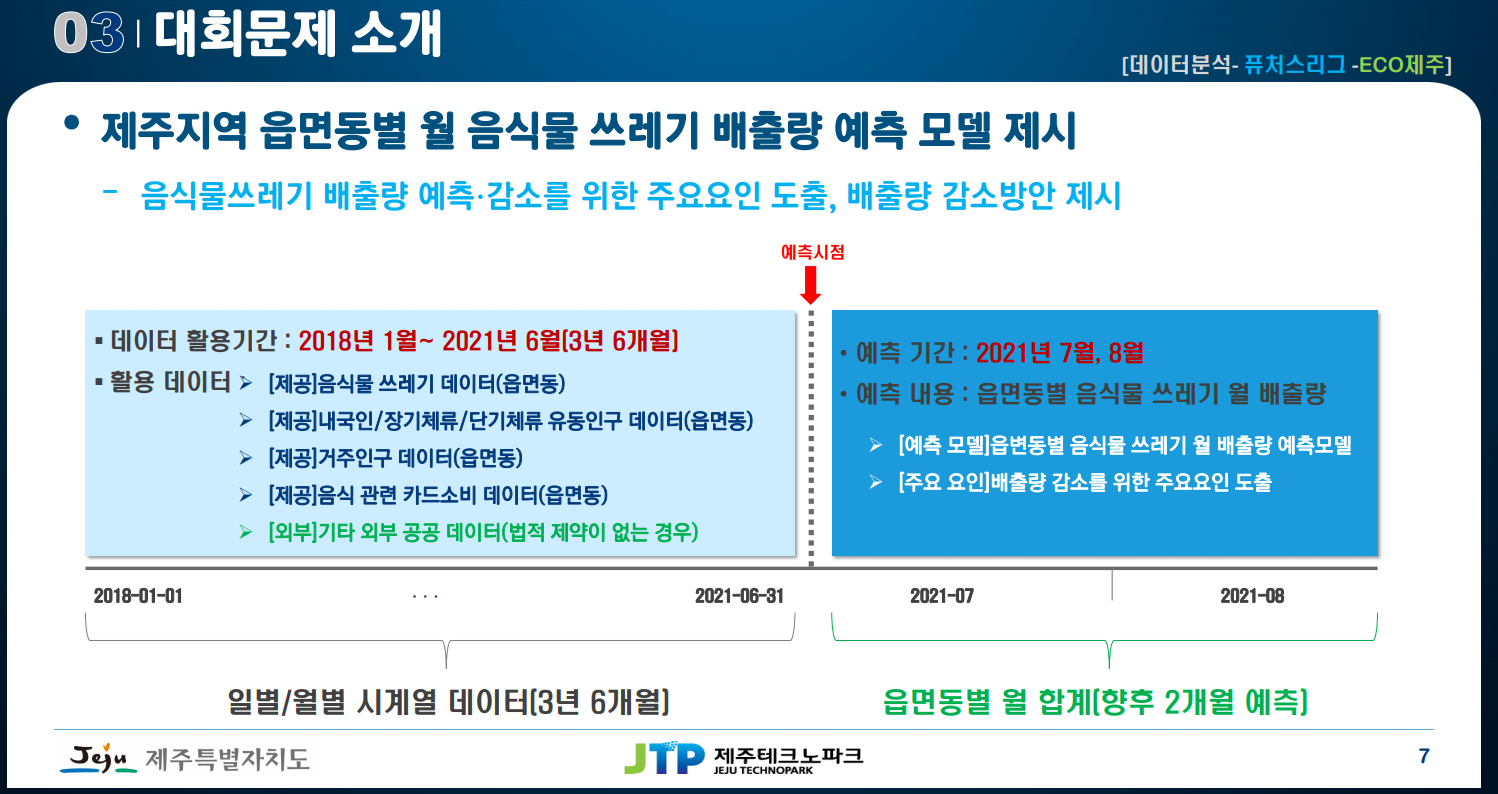

### Q. 문제 출제 목적에 해당하는 예상 요인들 위주로 일단 분석하여 결과 제시?? => 그리고 추가적으로 분석

### Q. 외부 데이터도 나와 있는것을 이용?? 

### Q. 우리가 예측해야하는 것은 월별 배출량! => 월별로 묶어서 분석 진행?

## 1.2 문제 해결을 위한 접근 방식
**데이터 탐색 -> 데이터 전처리 -> 모델링 -> 모델링 평가 및 성능 개선 -> 예측 및 결론 순으로 이루어진다..**

# 2. 탐색적 데이터 분석

정확한 데이터 분석을 위해서는 데이터에 대한 이해가 반드시 선행돼야 한다…… 전반적으로 데이터를 이해하기 위한 데이터 탐색 과정을 탐색적 데이터 분석이라고 합니다.

In [1]:
import pandas as pd


## 01_음식물쓰레기_FOOD_WASTE_210811_update : 총 2,211,445행 데이터 8열
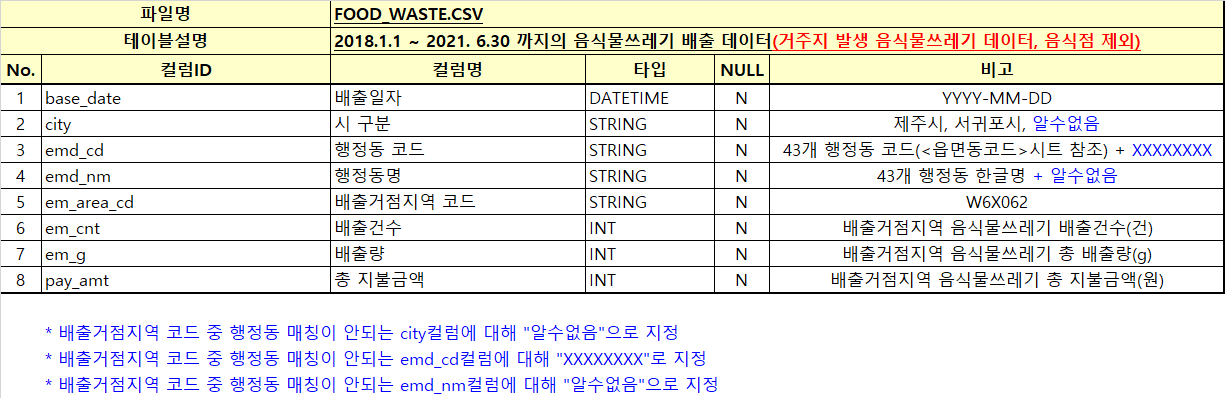

In [2]:
df_1 = pd.read_csv('01_음식물쓰레기_FOOD_WASTE_210811_update.csv', encoding = 'cp949')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
display(df_1.info())
display(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211445 entries, 0 to 2211444
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   base_date   object
 1   city        object
 2   emd_cd      object
 3   emd_nm      object
 4   em_area_cd  object
 5   em_cnt      int64 
 6   em_g        int64 
 7   pay_amt     int64 
dtypes: int64(3), object(5)
memory usage: 135.0+ MB


None

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


#### 결측치 확인

In [4]:
df_1.isnull().sum().to_frame()

,0
base_date,0
city,0
emd_cd,0
emd_nm,0
em_area_cd,0
em_cnt,0
em_g,0
pay_amt,0


#### 중복확인

In [5]:
df_1.duplicated().sum()

0

### Q.1 행정동코드 == 행정동명?? 중복되지 않을까,,,?
### Q.2 도시명과 행정동명 병합하여 분석?? = > 제주시_외도동, 제주시 아라동 => 데이터 용량 등 줄이는데 도움
### Q.3 em_area_cd 열은 아마,,,? 읍면동 별로 다르겠지?

### 02-1_내국인유동인구_KOREAN : 총 47,250,196행 데이터 11열
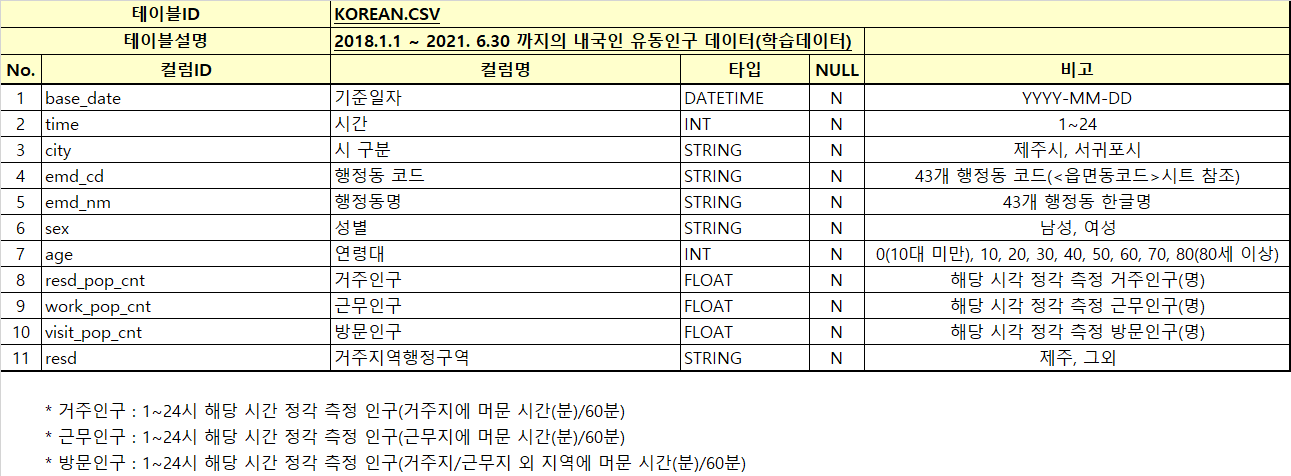

In [6]:
df_2_1 = pd.read_csv('02-1_내국인유동인구_KOREAN.csv', encoding = 'cp949')

In [7]:
display(df_2_1.info())
display(df_2_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47250196 entries, 0 to 47250195
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   city           object 
 3   emd_cd         int64  
 4   emd_nm         object 
 5   sex            object 
 6   age            int64  
 7   resd_pop_cnt   float64
 8   work_pop_cnt   float64
 9   visit_pop_cnt  float64
 10  resd           object 
dtypes: float64(3), int64(3), object(5)
memory usage: 3.9+ GB


None

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주
...,...,...,...,...,...,...,...,...,...,...,...
47250191,2021-06-30,24,서귀포시,50130620,예래동,남성,20,0.0000,0.0000,599.1969,그외
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,187.5990,41.9998,75.5996,제주
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,121.8467,0.0000,4.5128,제주
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122.2190,0.0000,4.5032,제주


### Q. 앞에서 진행했던것처럼 묶으면 될듯  ex) 도시명_한림읍
### Q.

#### 결측치 확인

In [8]:
df_2_1.isnull().sum().to_frame()

,0
base_date,0
time,0
city,0
emd_cd,0
emd_nm,0
sex,0
age,0
resd_pop_cnt,0
work_pop_cnt,0
visit_pop_cnt,0


#### 중복확인

In [9]:
df_2_1.duplicated().sum()

0

### 02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN : 총 23,837,317 행 데이터 10열
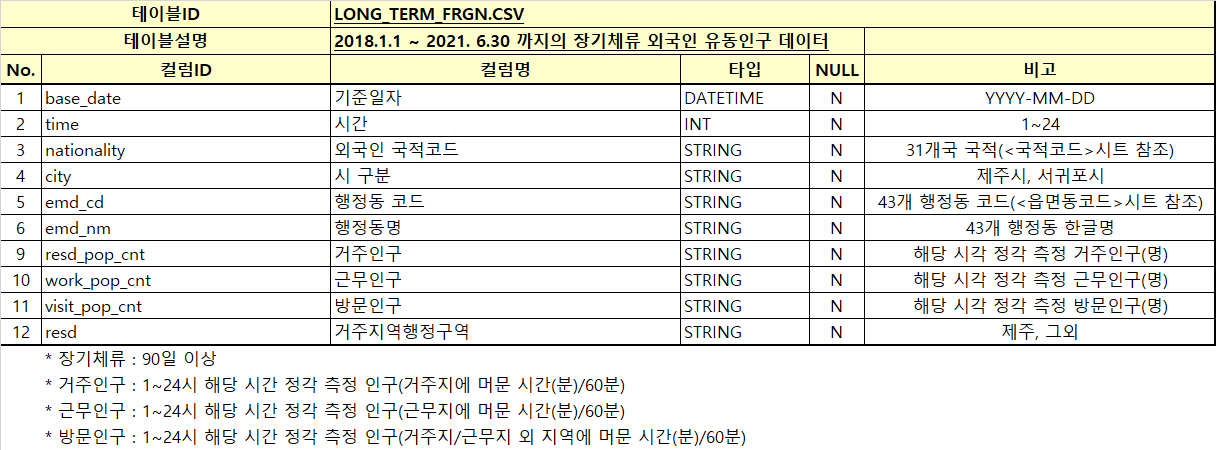

In [10]:
df_2_2 = pd.read_csv('02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv', encoding = 'cp949')

In [11]:
display(df_2_2.info())
display(df_2_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837317 entries, 0 to 23837316
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   resd_pop_cnt   float64
 7   work_pop_cnt   float64
 8   visit_pop_cnt  float64
 9   resd           object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.8+ GB


None

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0000,0.0000,3.3558,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0000,0.0000,12.2655,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.0624,0.0000,0.0000,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0000,0.0000,26.4749,그외


#### 결측치 확인

In [12]:
df_2_2.isnull().sum().to_frame()

,0
base_date,0
time,0
nationality,0
city,0
emd_cd,0
emd_nm,0
resd_pop_cnt,0
work_pop_cnt,0
visit_pop_cnt,0
resd,0


#### 중복확인

In [13]:
df_2_2.duplicated().sum()

0

### 02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN : 총 6,059,044행 데이터 7열
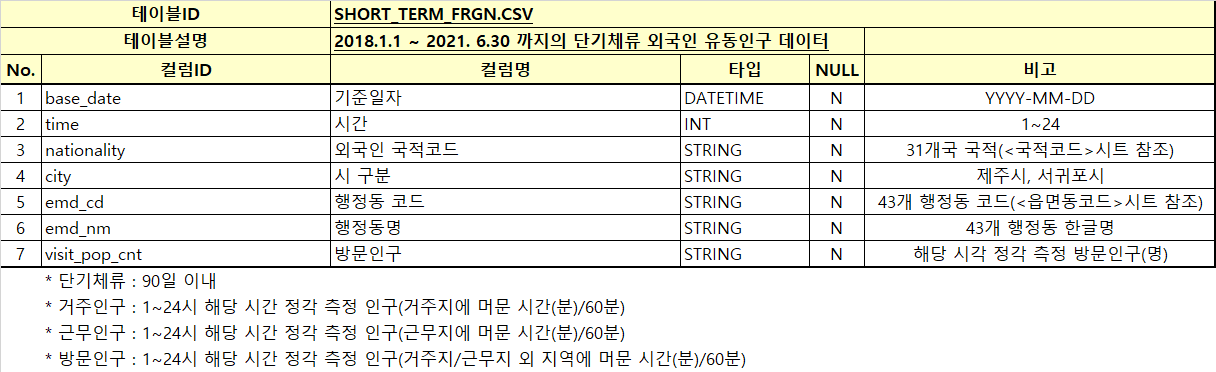

In [14]:
df_2_3 = pd.read_csv('02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv', encoding = 'cp949')

In [15]:
display(df_2_3.info())
display(df_2_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059044 entries, 0 to 6059043
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   visit_pop_cnt  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 323.6+ MB


None

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


#### 결측치 확인

In [16]:
df_2_3.isnull().sum().to_frame()

,0
base_date,0
time,0
nationality,0
city,0
emd_cd,0
emd_nm,0
visit_pop_cnt,0


#### 중복확인

In [17]:
df_2_3.duplicated().sum()

0

### 03_거주인구_RESIDENT_POP : 총 3,612행 데이터 9열
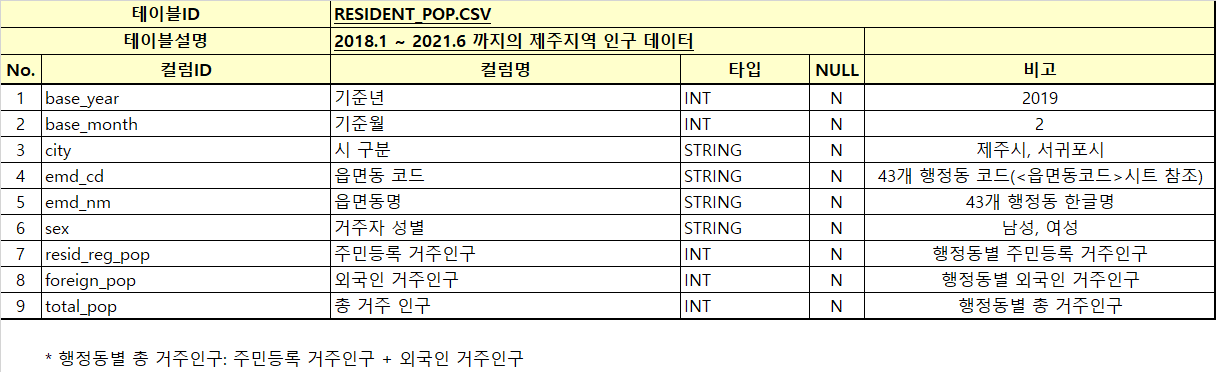

In [18]:
df_3 = pd.read_csv('03_거주인구_RESIDENT_POP.csv', encoding = 'cp949')

In [19]:
display(df_3.info())
display(df_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   base_year      3612 non-null   int64 
 1   base_month     3612 non-null   int64 
 2   city           3612 non-null   object
 3   emd_cd         3612 non-null   int64 
 4   emd_nm         3612 non-null   object
 5   sex            3612 non-null   object
 6   resid_reg_pop  3612 non-null   int64 
 7   foreign_pop    3612 non-null   int64 
 8   total_pop      3612 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 254.1+ KB


None

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234
...,...,...,...,...,...,...,...,...,...
3607,2021,6,제주시,50110250,한림읍,여성,10341,1140,11481
3608,2021,6,제주시,50110600,화북동,남성,12062,169,12231
3609,2021,6,제주시,50110600,화북동,여성,12238,161,12399
3610,2021,6,서귀포시,50130550,효돈동,남성,2660,39,2699


#### 결측치 확인

In [20]:
df_3.isnull().sum().to_frame()

,0
base_year,0
base_month,0
city,0
emd_cd,0
emd_nm,0
sex,0
resid_reg_pop,0
foreign_pop,0
total_pop,0


#### 중복확인

In [21]:
df_3.duplicated().sum()

0

### 04_음식관련 카드소비_CARD_SPENDING : 총 544,805행 데이터 7열
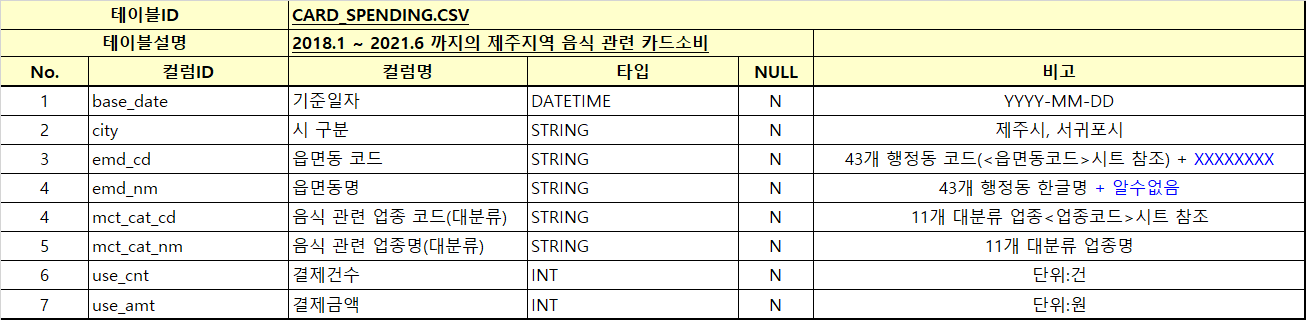

In [22]:
df_4 = pd.read_csv('04_음식관련 카드소비_CARD_SPENDING.csv', encoding = 'cp949')

In [23]:
display(df_4.info())
display(df_4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   base_date   544805 non-null  object
 1   city        544805 non-null  object
 2   emd_cd      544805 non-null  object
 3   emd_nm      544805 non-null  object
 4   mct_cat_cd  544805 non-null  object
 5   mct_cat_nm  544805 non-null  object
 6   use_cnt     544805 non-null  int64 
 7   use_amt     544805 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 33.3+ MB


None

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


#### 결측치 확인

In [24]:
df_4.isnull().sum().to_frame()

,0
base_date,0
city,0
emd_cd,0
emd_nm,0
mct_cat_cd,0
mct_cat_nm,0
use_cnt,0
use_amt,0


#### 중복확인

In [25]:
df_4.duplicated().sum()

0

### '코드 참고'
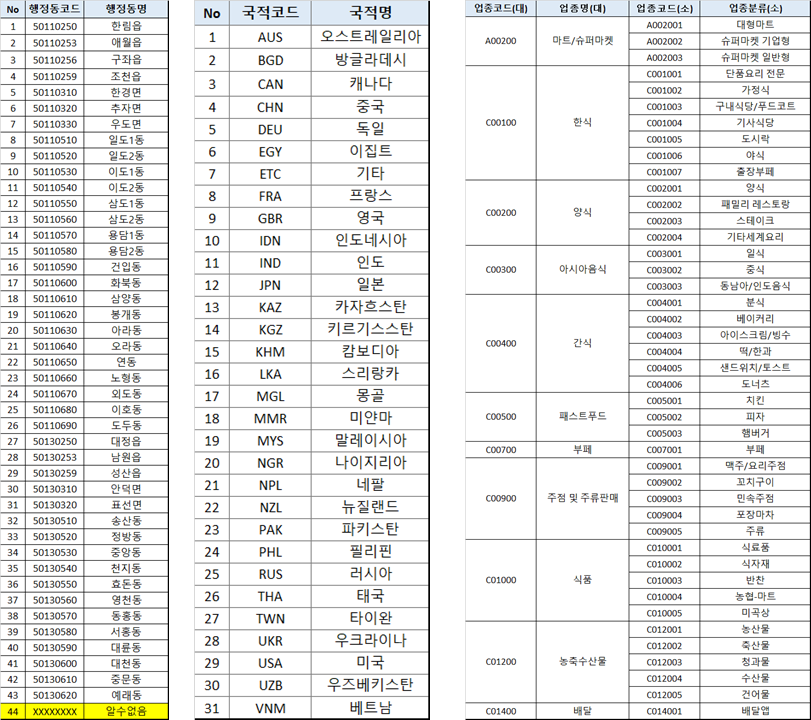